<a href="https://colab.research.google.com/github/ManshaP/CCEES/blob/master/exercise_2/1_second_iterate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

In [0]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np
%matplotlib inline

## 1. Second Iterate

Logistic map:
\begin{align*}
f(u_i)=u_{i+1} = \mu\ u_i\ (1-u_i)
\end{align*}

Second iterate of te logistic map:
\begin{align*}
f^2(u)  =f \left( f\left(u\right) \right) = \mu^2 \ u \ (1-u)\ \left[ 1-\mu\ u \ (1-u) \right]
\end{align*}

New map:
\begin{align*}
u_{i+1}  = f^2(u_i)
\end{align*}

### a)

### b)

In [0]:
# define logistic map
def logistic_map(u, mu):
    return mu * u * (1 - u)

# define second iterate of logistic map
def second_iterate_map(u, mu):
    return mu**2 * u * (1 - u) * (1 - mu * u * (1 - u))

# calculate multiple iterates at once
def first_two_iterates(mus, u_0s, steps=100):
    out = {}
    for mu in mus:
        u = np.linspace(0, 1, 400)
        out[mu] = {}
        
        # get u_i+1 dependence on u_i
        first_iterate = logistic_map(u, mu)
        second_iterate = logistic_map(u, mu)
        out[mu]['u_u_graph'] = [u, first_iterate, second_iterate]
        
        # get u_i dependence on 'time'
        out[mu]['u_steps'] = {}
        for u_0 in u_0s:
            out[mu]['u_steps'][u_0] = []
            u = u_0
            for i in range(steps):
                out[mu]['u_steps'][u_0].append(u)
                u = second_iterate_map(u, mu)
    return out

In [0]:
# calculate with given parameters

mus = [2., 3.1, 3.5, 3.55, 3.8]
u_0s = [.1, .3, .6, .9]
sim = first_two_iterates(mus, u_0s)

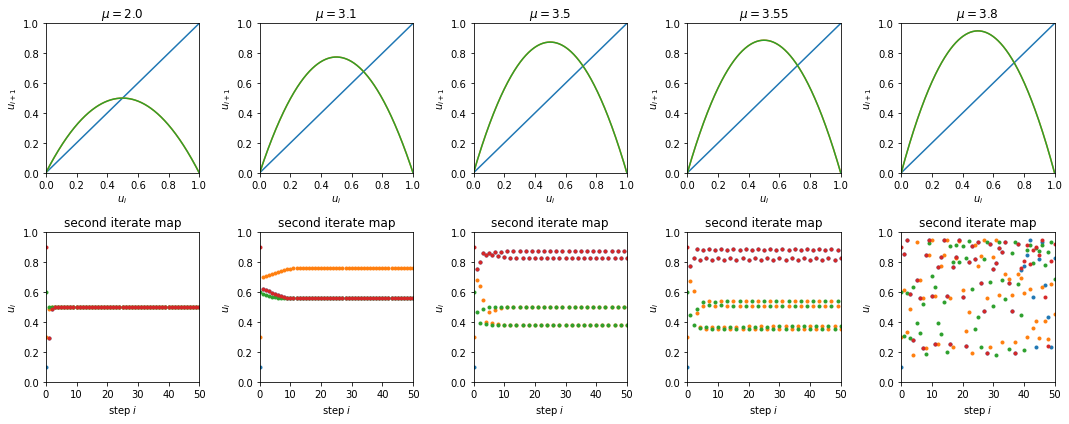

In [166]:
# plot results

n_mu = len(mus)

fig = plt.figure()

axs = []
for i in range(n_mu):
    axs.append([])
    axs[-1].append(plt.subplot2grid((2, n_mu), (0, i)))
    axs[-1].append(plt.subplot2grid((2, n_mu), (1, i)))
        
for i, mu in enumerate(sim.keys()):
    
    for iterate in sim[mu]['u_u_graph']:
        axs[i][0].plot(sim[mu]['u_u_graph'][0], iterate)
        
    axs[i][0].set_title(r'$\mu = {}$'.format(mu))
    axs[i][0].set_xlim(0, 1)
    axs[i][0].set_ylim(0, 1)
    axs[i][0].set_xlabel(r'$u_i$')
    axs[i][0].set_ylabel(r'$u_{i+1}$')
        
    for u_0, u_i in sim[mu]['u_steps'].items():
        axs[i][1].plot(u_i, linestyle='none', marker='.')
        
    axs[i][1].set_title(r'second iterate map')
    axs[i][1].set_ylim(0, 1)
    axs[i][1].set_xlim(0, 50)
    axs[i][1].set_xlabel(r'step $i$')
    axs[i][1].set_ylabel(r'$u_i$')
        
fig.set_size_inches(15, 6)
fig.tight_layout()
plt.show()

### c)

In [0]:
# define n-th iterate of logistic map
def n_iterate_map(n, u, mu):
    if n == 0:
        return u
    elif n == 1:
        return logistic_map(u, mu)
    else:
        return logistic_map(n_iterate_map(n-1, u, mu), mu)
    
# define calculation of multiple iterates at once
def n_iterates(mus, u_0s, iterates=[0, 1, 2, 4], steps=100):
    out = {}
    for mu in mus:
        u = np.linspace(0, 1, 400)
        out[mu] = {} 
        
        # get u_i+1 dependence on u_i
        out[mu]['u_u_graph'] = [u]
        for iterate in iterates:
            nth_iterate = n_iterate_map(iterate, u, mu)
            out[mu]['u_u_graph'].append(nth_iterate)
        
        # get u_i dependence on 'time'
        out[mu]['u_steps'] = {}
        for iterate in iterates:
            out[mu]['u_steps'][iterate] = {}
            for u_0 in u_0s:
                out[mu]['u_steps'][iterate][u_0] = []
                u = u_0
                for i in range(steps):
                    out[mu]['u_steps'][iterate][u_0].append(u)
                    u = n_iterate_map(iterate, u, mu)
    return out

In [0]:
# calculate with given parameters

mus = [2., 3.1, 3.5, 3.55, 3.8]
u_0s = [.1]
iterates = [1, 2, 4, 8]

sim = n_iterates(mus, u_0s, iterates)

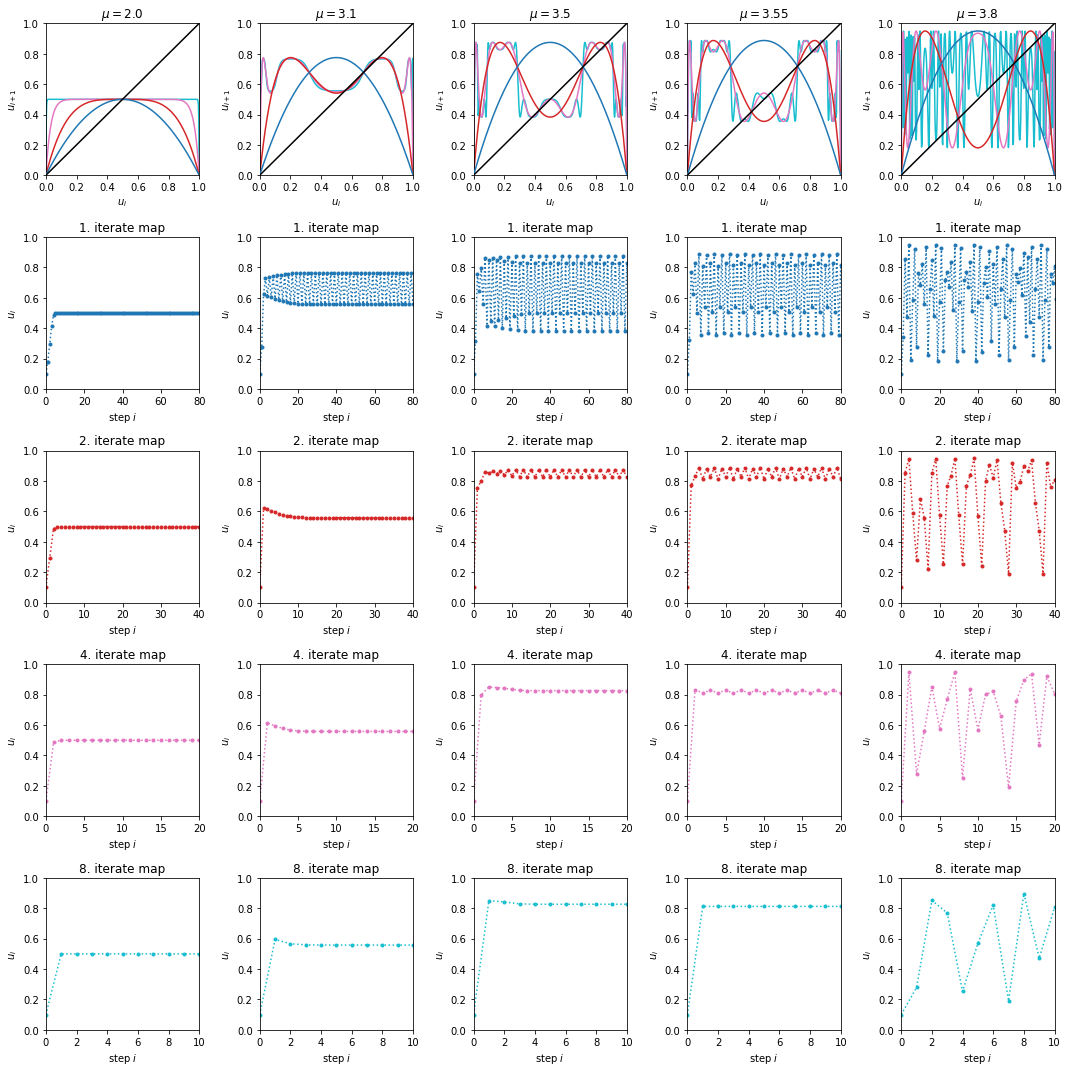

In [207]:
# plot results

n_mu = len(mus)
n_iters = len(iterates)

cmap = get_cmap('tab10')

color_indices = np.linspace(0, 1, n_iters)
colors = ['k'] + [cmap(i) for i in color_indices]

fig = plt.figure()

axs = []
for i in range(n_mu):
    axs.append([])
    axs[-1].append(plt.subplot2grid((n_iters+1, n_mu), (0, i)))
    for j in range(n_iters):
        axs[-1].append(plt.subplot2grid((n_iters+1, n_mu), (j+1, i)))
        
for i, mu in enumerate(sim.keys()):
    
    for i_iter, iterate in enumerate(sim[mu]['u_u_graph']):
        axs[i][0].plot(sim[mu]['u_u_graph'][0], iterate, color=colors[i_iter], zorder=n_iters-i_iter)
        
    axs[i][0].set_title(r'$\mu = {}$'.format(mu))
    axs[i][0].set_xlim(0, 1)
    axs[i][0].set_ylim(0, 1)
    axs[i][0].set_xlabel(r'$u_i$')
    axs[i][0].set_ylabel(r'$u_{i+1}$')
    
    for j, iterate in enumerate(sim[mu]['u_steps'].keys()):
        for u_0, u_i in sim[mu]['u_steps'][iterate].items():
            axs[i][j+1].plot(u_i, linestyle=':', marker='.', color=colors[j+1])
            
        n_iterate = iterates[j]
        
        axs[i][j+1].set_title(r'{}. iterate map'.format(iterate))
        axs[i][j+1].set_ylim(0, 1)
        axs[i][j+1].set_xlim(0, 80//n_iterate)
        axs[i][j+1].set_xlabel(r'step $i$')
        axs[i][j+1].set_ylabel(r'$u_i$')
                
fig.set_size_inches(3 * n_mu, 3 * (n_iters+1))
fig.tight_layout()
plt.show()